In [1]:
### I read the entire 700 page code book
# see 
# https://www2.census.gov/library/publications/cen2010/doc/sf1.pdf

In [2]:
import pandas as pd
import numpy as np
#from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import sys
print(sys.version)
%matplotlib inline

2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]


In [15]:
df = pd.read_csv('./Cleaned_Data_Files_No_Headers/TN_clean_no_headers/tn_geo_cleaned_2010_no_header.txt', sep=',', header=None, names=['sf', 'st', 'a', 'b', 'c', 'location'], dtype=str)

In [16]:
df.head()

,sf,st,a,b,c,location
0,SF1ST,TN,40,00,0,Tennessee
1,SF1ST,TN,40,89,0,Tennessee
2,SF1ST,TN,40,90,0,Tennessee
3,SF1ST,TN,40,91,0,Tennessee
4,SF1ST,TN,40,92,0,Tennessee


In [6]:
q = "select * from df where location like '%County';"

In [6]:
###We can see from this set that the County keys are NOT unique.  We'll have to run the 
###Analysis using the index as keys.  The best way to do that is by using pandas 
### and calling with df.iloc

In [7]:
tn_geo = df

In [8]:
tn_geo.head()

,sf,st,a,b,c,location
0,SF1ST,TN,40,00,0,Tennessee
1,SF1ST,TN,40,89,0,Tennessee
2,SF1ST,TN,40,90,0,Tennessee
3,SF1ST,TN,40,91,0,Tennessee
4,SF1ST,TN,40,92,0,Tennessee


In [13]:
tn_county_map = pd.read_csv('tn_dist_county_map.csv', sep = ',')

In [17]:
tn_county_map.head()


,County,Congressional_District,District_of_Concern
0,Anderson County,3,no concerns
1,Bedford County,4,no concerns
2,Benton County,7,dist of concern
3,Benton County,8,no concerns
4,Bledsoe County,4,no concerns


In [18]:
tn_geo.shape

(277726, 6)

In [19]:
p10 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p10_2010.txt', sep = '\t')

In [20]:
p10.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,3,96,84,4.2,0.1,1.2,5.1,2,3.1,3.2
0,SF1ST,TN,0,4,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SF1ST,TN,0,4,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SF1ST,TN,0,4,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SF1ST,TN,0,4,5,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SF1ST,TN,0,4,6,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
### get the list of indices that correspond to County data
tn_geo.columns

Index([u'sf', u'st', u'a', u'b', u'c', u'location'], dtype='object')

In [23]:
a = tn_geo[tn_geo['location'].str.contains("County")==True]
b = a[a['location'].str.contains("(part)")==False]
c = b[b['location'].str.contains("Schools")==False].index.values.tolist()

C:\Users\icwang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


In [24]:
c

[19L,
 3277L,
 5728L,
 7457L,
 8691L,
 14025L,
 17703L,
 20211L,
 21020L,
 23578L,
 26245L,
 27553L,
 28622L,
 30456L,
 31116L,
 33720L,
 36780L,
 37931L,
 41568L,
 53952L,
 55441L,
 56520L,
 59429L,
 61562L,
 63996L,
 64975L,
 68245L,
 71844L,
 74719L,
 76149L,
 80616L,
 81939L,
 84536L,
 94286L,
 94968L,
 97244L,
 99847L,
 102906L,
 104495L,
 106686L,
 109417L,
 111907L,
 112844L,
 114942L,
 115659L,
 118416L,
 119569L,
 128927L,
 129501L,
 130896L,
 133776L,
 134864L,
 137087L,
 140493L,
 143672L,
 146056L,
 147179L,
 151013L,
 153245L,
 155276L,
 160102L,
 161231L,
 164396L,
 168516L,
 169061L,
 170356L,
 173022L,
 174258L,
 175501L,
 175983L,
 177729L,
 181408L,
 183407L,
 187138L,
 189488L,
 195100L,
 196749L,
 197605L,
 202341L,
 221603L,
 222915L,
 224588L,
 230904L,
 235294L,
 236945L,
 237420L,
 238743L,
 239930L,
 240614L,
 242530L,
 247350L,
 249342L,
 252212L,
 253643L,
 258611L,
 263544L,
 263545L,
 263977L,
 263978L,
 265280L,
 265283L,
 265286L,
 265287L,
 265288L,
 265

In [25]:
indices = []
indices = [0]
for county in c:
    indices.append(county)
indices

[0,
 19L,
 3277L,
 5728L,
 7457L,
 8691L,
 14025L,
 17703L,
 20211L,
 21020L,
 23578L,
 26245L,
 27553L,
 28622L,
 30456L,
 31116L,
 33720L,
 36780L,
 37931L,
 41568L,
 53952L,
 55441L,
 56520L,
 59429L,
 61562L,
 63996L,
 64975L,
 68245L,
 71844L,
 74719L,
 76149L,
 80616L,
 81939L,
 84536L,
 94286L,
 94968L,
 97244L,
 99847L,
 102906L,
 104495L,
 106686L,
 109417L,
 111907L,
 112844L,
 114942L,
 115659L,
 118416L,
 119569L,
 128927L,
 129501L,
 130896L,
 133776L,
 134864L,
 137087L,
 140493L,
 143672L,
 146056L,
 147179L,
 151013L,
 153245L,
 155276L,
 160102L,
 161231L,
 164396L,
 168516L,
 169061L,
 170356L,
 173022L,
 174258L,
 175501L,
 175983L,
 177729L,
 181408L,
 183407L,
 187138L,
 189488L,
 195100L,
 196749L,
 197605L,
 202341L,
 221603L,
 222915L,
 224588L,
 230904L,
 235294L,
 236945L,
 237420L,
 238743L,
 239930L,
 240614L,
 242530L,
 247350L,
 249342L,
 252212L,
 253643L,
 258611L,
 263544L,
 263545L,
 263977L,
 263978L,
 265280L,
 265283L,
 265286L,
 265287L,
 265288L,


In [26]:
len(indices)

511

In [27]:
p10.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,3,96,84,4.2,0.1,1.2,5.1,2,3.1,3.2
0,SF1ST,TN,0,4,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SF1ST,TN,0,4,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SF1ST,TN,0,4,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SF1ST,TN,0,4,5,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SF1ST,TN,0,4,6,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
p10.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Population_of_one_race', u'White_alone',
       u'Black_or_African_American_alone',
       u'American_Indian_and_Alaska_Native_alone',
       ...
       u'3', u'96', u'84', u'4.2', u'0.1', u'1.2', u'5.1', u'2', u'3.1',
       u'3.2'],
      dtype='object', length=151)

In [29]:
p8 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p8_2010.txt', sep = '\t')

In [30]:
p8.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Population_of_one_race,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,3,137,116,9,0.1,3.1,7,2.2,4.1,4.2
0,SF1ST,TN,0,3,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SF1ST,TN,0,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SF1ST,TN,0,3,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SF1ST,TN,0,3,5,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SF1ST,TN,0,3,6,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
p8.columns
p8_cols = ['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO','Total','White_alone','Black_or_African_American_alone','Asian_alone']

In [32]:
p8_edited = p8[p8_cols]

In [33]:
p8_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone
0,SF1ST,TN,0,3,2,0,0,0,0
1,SF1ST,TN,0,3,3,0,0,0,0
2,SF1ST,TN,0,3,4,0,0,0,0
3,SF1ST,TN,0,3,5,0,0,0,0
4,SF1ST,TN,0,3,6,0,0,0,0


In [34]:
#p8 is highly complex, D4D only wanted high level data, so let's use p3
p3 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p3_2010.txt', sep = '\t')

In [35]:
p3.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,Asian_alone,Native_Hawaiian_and_Other_Pacific_Islander_alone,Some_Other_Race_alone,Two_or_More_Races
0,SF1ST,TN,0,3,1,6346105,4921948,1057315,19994,91242,3642,141955,110009
1,SF1ST,TN,0,3,2,0,0,0,0,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0,0,0,0,0


In [36]:
p3.shape

(277726, 13)

In [37]:
p3_edited = p3[p8_cols]

In [38]:
p3_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone
0,SF1ST,TN,0,3,1,6346105,4921948,1057315,91242
1,SF1ST,TN,0,3,2,0,0,0,0
2,SF1ST,TN,0,3,3,0,0,0,0
3,SF1ST,TN,0,3,4,0,0,0,0
4,SF1ST,TN,0,3,5,0,0,0,0


In [39]:
p8.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Population_of_one_race', u'White_alone',
       u'Black_or_African_American_alone',
       u'American_Indian_and_Alaska_Native_alone',
       ...
       u'3', u'137', u'116', u'9', u'0.1', u'3.1', u'7', u'2.2', u'4.1',
       u'4.2'],
      dtype='object', length=151)

In [40]:
### p3 doesn't include latinos, but p4 does
p4 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p4_2010.txt', sep = '\t')

In [41]:
p4.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Not_Hispanic_or_Latino_', u'Hispanic_or_LatinoSF1ST', u'TN', u'000',
       u'03', u'0000001', u'6346105', u'6056046', u'290059'],
      dtype='object')

In [42]:
p4.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Not_Hispanic_or_Latino_,Hispanic_or_LatinoSF1ST,TN,000,03,0000001,6346105,6056046,290059
0,SF1ST,TN,0,3,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SF1ST,TN,0,3,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SF1ST,TN,0,3,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SF1ST,TN,0,3,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SF1ST,TN,0,3,6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#p5 combines race and latino origin
p5 = pd.read_csv('./Cleaned_Data_With_Text_Headers/TN_clean_with_text_headers/tn_p5_2010.txt', sep = '\t')

In [44]:
p5.head()


,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,American_Indian_and_Alaska_Native_alone,...,6422,90071,290059,121166,7924,3692,931,875,135533,19938
0,SF1ST,TN,0,3,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SF1ST,TN,0,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SF1ST,TN,0,3,4,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SF1ST,TN,0,3,5,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SF1ST,TN,0,3,6,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
p5.columns

Index([u'FILEID', u'STUSAB', u'CHARITER', u'CIFSN', u'LOGRECNO', u'Total',
       u'Not_Hispanic_or_Latino', u'White_alone',
       u'Black_or_African_American_alone',
       u'American_Indian_and_Alaska_Native_alone', u'Asian_alone',
       u'Native_Hawaiian_and_Other_Pacific_Islander_alone_',
       u'Some_Other_Race_alone', u'Two_or_More_Races', u'Hispanic_or_Latino_',
       u'White_alone.1', u'Black_or_African_American_alone.1',
       u'American_Indian_and_Alaska_Native_alone.1', u'Asian_alone.1',
       u'Native_Hawaiian_and_Other_Pacific_Islander_alone_.1',
       u'Some_Other_Race_alone.1', u'Two_or_More_RacesSF1ST', u'TN', u'000',
       u'03', u'0000001', u'6346105', u'6056046', u'4800782', u'1049391',
       u'16302', u'90311', u'2767', u'6422', u'90071', u'290059', u'121166',
       u'7924', u'3692', u'931', u'875', u'135533', u'19938'],
      dtype='object')

In [46]:
p5[['Not_Hispanic_or_Latino', 'White_alone',
       'Black_or_African_American_alone',
       'Asian_alone',
       'Hispanic_or_Latino_',
       'White_alone.1', 'Black_or_African_American_alone.1',
       'American_Indian_and_Alaska_Native_alone.1', 'Asian_alone.1']]

,Not_Hispanic_or_Latino,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,White_alone.1,Black_or_African_American_alone.1,American_Indian_and_Alaska_Native_alone.1,Asian_alone.1
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,5431346,4232628,1004720,88544,276568,115176,7628,3489,895
8,2277495,1377263,796809,49958,177107,67557,5797,2145,522
9,3153851,2855365,207911,38586,99461,47619,1831,1344,373


In [47]:
indices

[0,
 19L,
 3277L,
 5728L,
 7457L,
 8691L,
 14025L,
 17703L,
 20211L,
 21020L,
 23578L,
 26245L,
 27553L,
 28622L,
 30456L,
 31116L,
 33720L,
 36780L,
 37931L,
 41568L,
 53952L,
 55441L,
 56520L,
 59429L,
 61562L,
 63996L,
 64975L,
 68245L,
 71844L,
 74719L,
 76149L,
 80616L,
 81939L,
 84536L,
 94286L,
 94968L,
 97244L,
 99847L,
 102906L,
 104495L,
 106686L,
 109417L,
 111907L,
 112844L,
 114942L,
 115659L,
 118416L,
 119569L,
 128927L,
 129501L,
 130896L,
 133776L,
 134864L,
 137087L,
 140493L,
 143672L,
 146056L,
 147179L,
 151013L,
 153245L,
 155276L,
 160102L,
 161231L,
 164396L,
 168516L,
 169061L,
 170356L,
 173022L,
 174258L,
 175501L,
 175983L,
 177729L,
 181408L,
 183407L,
 187138L,
 189488L,
 195100L,
 196749L,
 197605L,
 202341L,
 221603L,
 222915L,
 224588L,
 230904L,
 235294L,
 236945L,
 237420L,
 238743L,
 239930L,
 240614L,
 242530L,
 247350L,
 249342L,
 252212L,
 253643L,
 258611L,
 263544L,
 263545L,
 263977L,
 263978L,
 265280L,
 265283L,
 265286L,
 265287L,
 265288L,


In [48]:
p5_edited = p5[['FILEID', 'STUSAB', 'CHARITER', 'CIFSN', 'LOGRECNO','Total',
    'White_alone','Black_or_African_American_alone','Asian_alone','Hispanic_or_Latino_']].ix[indices]

In [49]:
p5_edited.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_
0,SF1ST,TN,0,3,2,0,0,0,0,0
19,SF1ST,TN,0,3,21,10065,9617,134,32,102
3277,SF1ST,TN,0,3,3279,4891,4415,189,79,141
5728,SF1ST,TN,0,3,5730,2939,2768,53,13,57
7457,SF1ST,TN,0,3,7459,2945,2499,369,3,42


In [56]:
def percentages(df):
    if df['Total'] == 0:
        df['caucasian_percentage'] = 0
        df['african_percentage'] = 0
        df['asian_percentage'] = 0
        df['latino_percentage'] = 0
    else:
        df['caucasian_percentage'] = float(df['White_alone'])/df['Total']
        df['african_percentage'] = float(df['Black_or_African_American_alone'])/df['Total']
        df['asian_percentage'] = float(df['Asian_alone'])/df['Total']
        df['latino_percentage'] = float(df['Hispanic_or_Latino_'])/df['Total']
    return df

p5_percent = p5_edited.apply(percentages, axis=1)

In [57]:
p5_percent.head()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
0,SF1ST,TN,0,3,2,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
19,SF1ST,TN,0,3,21,10065,9617,134,32,102,0.955489,0.013313,0.003179,0.010134
3277,SF1ST,TN,0,3,3279,4891,4415,189,79,141,0.902678,0.038642,0.016152,0.028828
5728,SF1ST,TN,0,3,5730,2939,2768,53,13,57,0.941817,0.018033,0.004423,0.019394
7457,SF1ST,TN,0,3,7459,2945,2499,369,3,42,0.848557,0.125297,0.001019,0.014261


In [58]:
p5_percent.tail()

,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
277719,SF1ST,TN,0,3,277721,35021,30696,2717,365,700,0.876503,0.077582,0.010422,0.019988
277720,SF1ST,TN,0,3,277722,7163,6196,723,7,126,0.865001,0.100935,0.000977,0.017590
277722,SF1ST,TN,0,3,277724,147489,132127,4395,4593,4155,0.895843,0.029799,0.031141,0.028172
277723,SF1ST,TN,0,3,277725,84298,76160,3841,900,1945,0.903462,0.045565,0.010676,0.023073
277724,SF1ST,TN,0,3,277726,275812,214836,32151,5623,16705,0.778922,0.116569,0.020387,0.060567


In [59]:
p5_w_county_name = pd.concat([tn_geo['location'].ix[indices], p5_percent], axis=1)

In [60]:
p5_w_county_name.head()

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage
0,Tennessee,SF1ST,TN,0,3,2,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
19,Anderson County,SF1ST,TN,0,3,21,10065,9617,134,32,102,0.955489,0.013313,0.003179,0.010134
3277,Bedford County,SF1ST,TN,0,3,3279,4891,4415,189,79,141,0.902678,0.038642,0.016152,0.028828
5728,Benton County,SF1ST,TN,0,3,5730,2939,2768,53,13,57,0.941817,0.018033,0.004423,0.019394
7457,Bledsoe County,SF1ST,TN,0,3,7459,2945,2499,369,3,42,0.848557,0.125297,0.001019,0.014261


In [61]:
q = 'select p.*, c.* from p5_w_county_name p join tn_county_map c on c.County = p.location;'

In [62]:
comb = pysqldf(q)
comb.head()

NameError: global name 'sqldf' is not defined

In [49]:
comb.tail()
#comb_all = pd.concat([p5_w_county_name.ix[0],comb], axis =1)

,location,FILEID,STUSAB,CHARITER,CIFSN,LOGRECNO,Total,White_alone,Black_or_African_American_alone,Asian_alone,Hispanic_or_Latino_,caucasian_percentage,african_percentage,asian_percentage,latino_percentage,County,Congressional_District,District_of_Concern
417,Jackson County,SF1ST,NC,0,3,342234,40271,32795,729,339,2038,0.814358,0.018102,0.008418,0.050607,Jackson County,11,no concerns
418,Swain County,SF1ST,NC,0,3,342271,13981,9168,75,66,540,0.655747,0.005364,0.004721,0.038624,Swain County,11,no concerns
419,Cherokee County,SF1ST,NC,0,3,342297,27444,25341,327,131,688,0.923371,0.011915,0.004773,0.025069,Cherokee County,11,no concerns
420,Clay County,SF1ST,NC,0,3,342311,10587,10080,64,24,258,0.952111,0.006045,0.002267,0.024370,Clay County,11,no concerns
421,Graham County,SF1ST,NC,0,3,342320,8861,7942,17,29,194,0.896287,0.001919,0.003273,0.021894,Graham County,11,no concerns


In [50]:
nc_county_map.head()

,County,Congressional_District,District_of_Concern
0,Alamance County,6,no concerns
1,Alexander County,5,no concerns
2,Alleghany County,5,no concerns
3,Anson County,9,no concerns
4,Ashe County,5,no concerns


In [51]:
comb.shape

(422, 18)

In [52]:
comb_all = pd.concat([pd.DataFrame(p5_w_county_name.ix[0]).T,comb], axis =0)

In [53]:
comb_all.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,STUSAB,Total,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location
0,206579,2019854,0,3,NaN,NaN,NaN,SF1ST,800120,1,NC,9535483,6223995,0.211825,0.0216642,0.652719,0.0839098,North Carolina
0,1806,27985,0,3,6.0,Alamance County,no concerns,SF1ST,16639,20,NC,151131,101718,0.18517,0.0119499,0.673045,0.110097,Alamance County
1,357,2025,0,3,5.0,Alexander County,no concerns,SF1ST,1601,5008,NC,37198,32671,0.0544384,0.00959729,0.8783,0.0430399,Alexander County
2,53,133,0,3,5.0,Alleghany County,no concerns,SF1ST,1004,6257,NC,11155,9862,0.0119229,0.00475123,0.884088,0.0900045,Alleghany County
3,281,13038,0,3,9.0,Anson County,no concerns,SF1ST,812,7272,NC,26948,12344,0.483821,0.0104275,0.458067,0.0301321,Anson County


In [54]:
dists = pd.concat([pd.DataFrame(p5_w_county_name.ix[0]).T,comb_all[comb_all['District_of_Concern'] == 'dist of concern']], axis = 0)

In [55]:
dists.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,STUSAB,Total,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location
0,206579,2019854,0,3,NaN,NaN,NaN,SF1ST,800120,1,NC,9535483,6223995,0.211825,0.0216642,0.652719,0.0839098,North Carolina
7,103,13252,0,3,1.0,Bertie County,dist of concern,SF1ST,267,15440,NC,21282,7393,0.622686,0.00483977,0.347383,0.0125458,Bertie County
34,12180,100260,0,3,1.0,Durham County,dist of concern,SF1ST,36077,95109,NC,267587,112697,0.374682,0.0455179,0.42116,0.134823,Durham County
36,113,32318,0,3,1.0,Edgecombe County,dist of concern,SF1ST,2104,100738,NC,56552,21360,0.571474,0.00199816,0.377705,0.0372047,Edgecombe County
40,17,4040,0,3,1.0,Gates County,dist of concern,SF1ST,173,120461,NC,12197,7684,0.331229,0.00139379,0.629991,0.0141838,Gates County


In [56]:
dists[['location','african_percentage','asian_percentage','caucasian_percentage','latino_percentage']]

,location,african_percentage,asian_percentage,caucasian_percentage,latino_percentage
0,North Carolina,0.211825,0.0216642,0.652719,0.0839098
7,Bertie County,0.622686,0.00483977,0.347383,0.0125458
34,Durham County,0.374682,0.0455179,0.42116,0.134823
36,Edgecombe County,0.571474,0.00199816,0.377705,0.0372047
40,Gates County,0.331229,0.00139379,0.629991,0.0141838
42,Granville County,0.324688,0.0053575,0.576641,0.0748047
46,Halifax County,0.529996,0.00652758,0.394379,0.0210638
50,Hertford County,0.601767,0.00514816,0.343711,0.0261056
65,Martin County,0.432606,0.00289737,0.521934,0.0313814
67,Mecklenburg County,0.302342,0.0456609,0.506044,0.121727


In [57]:
### isolate the state's demographic proportions
state_tot = dists.ix[0]['Total']
state_asian = dists.ix[0]['asian_percentage']
state_african = dists.ix[0]['african_percentage']
state_caucasian = dists.ix[0]['caucasian_percentage']
state_latino = dists.ix[0]['latino_percentage']

dists['asian_deviation_from_mean'] = dists['asian_percentage'].map(lambda x: x/state_asian )
dists['african_deviation_from_mean'] = dists['african_percentage'].map(lambda x: x/state_african )
dists['caucasian_deviation_from_mean'] = dists['caucasian_percentage'].map(lambda x: x/state_caucasian)
dists['latino_deviation_from_mean'] = dists['latino_percentage'].map(lambda x: x/state_latino)

In [58]:
dists.head()

,Asian_alone,Black_or_African_American_alone,CHARITER,CIFSN,Congressional_District,County,District_of_Concern,FILEID,Hispanic_or_Latino_,LOGRECNO,...,White_alone,african_percentage,asian_percentage,caucasian_percentage,latino_percentage,location,asian_deviation_from_mean,african_deviation_from_mean,caucasian_deviation_from_mean,latino_deviation_from_mean
0,206579,2019854,0,3,NaN,NaN,NaN,SF1ST,800120,1,...,6223995,0.211825,0.0216642,0.652719,0.0839098,North Carolina,1.000000,1.000000,1.000000,1.000000
7,103,13252,0,3,1.0,Bertie County,dist of concern,SF1ST,267,15440,...,7393,0.622686,0.00483977,0.347383,0.0125458,Bertie County,0.223399,2.939623,0.532208,0.149516
34,12180,100260,0,3,1.0,Durham County,dist of concern,SF1ST,36077,95109,...,112697,0.374682,0.0455179,0.42116,0.134823,Durham County,2.101062,1.768827,0.645239,1.606767
36,113,32318,0,3,1.0,Edgecombe County,dist of concern,SF1ST,2104,100738,...,21360,0.571474,0.00199816,0.377705,0.0372047,Edgecombe County,0.092233,2.697859,0.578664,0.443389
40,17,4040,0,3,1.0,Gates County,dist of concern,SF1ST,173,120461,...,7684,0.331229,0.00139379,0.629991,0.0141838,Gates County,0.064336,1.563691,0.965179,0.169037


In [59]:
#the deviations from mean look pretty big.  Check out in a bar chart
dists.drop_duplicates(inplace = True)
dists.shape

(54, 22)

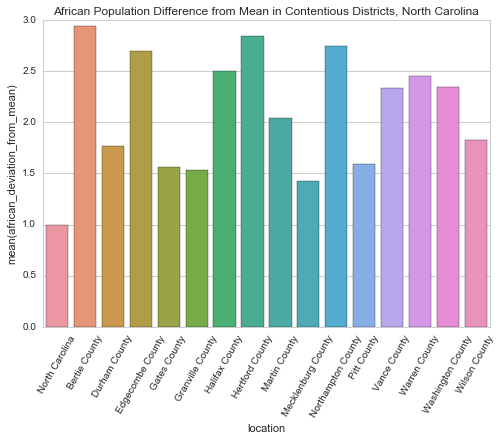

In [60]:
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(x='location', y='african_deviation_from_mean', data = dists)
ax.set_xticklabels(labels=dists['location'],rotation=60)
ax.set_title('African Population Difference from Mean in Contentious Districts, North Carolina')

sns.plt.show()

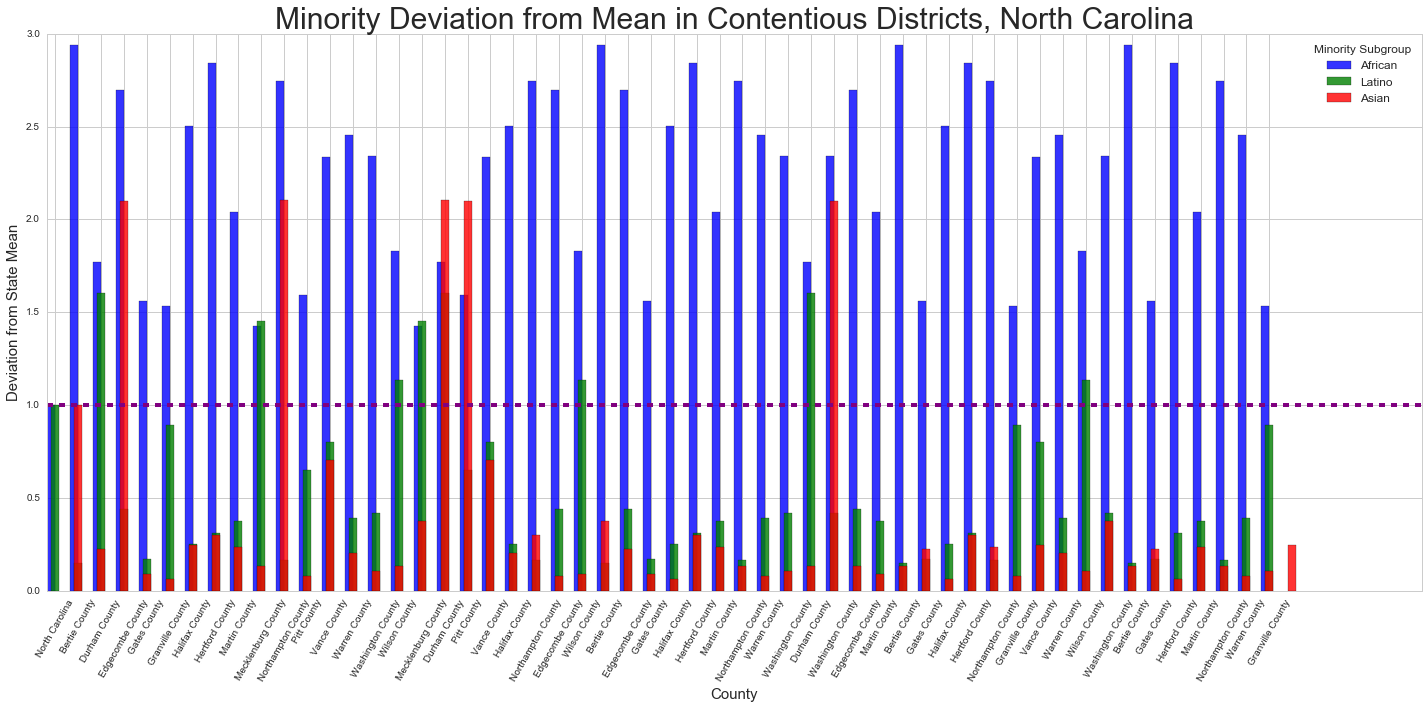

In [78]:
n_groups = dists.shape[0]
african_means = dists['african_deviation_from_mean']
latino_means = dists['latino_deviation_from_mean']
asian_means = dists['asian_deviation_from_mean']
 
# create plot
fig = plt.figure( figsize=(20,10))

#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, african_means, bar_width,
                 alpha=opacity,
                 color='b',
                 label='African')
 
rects2 = plt.bar(index + bar_width/2, latino_means, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Latino')

rects3 = plt.bar(index + bar_width/2 +1, asian_means, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Asian')
 
plt.xlabel('County',fontsize = 15)
plt.ylabel('Deviation from State Mean',fontsize = 15)
plt.title('Minority Deviation from Mean in Contentious Districts, North Carolina', fontsize = 30)
plt.xticks(index + bar_width, (dists['location']), rotation =60, label = 6)
plt.axhline(y=1, color='purple', linestyle='dashed', linewidth=4)
plt.legend(title = 'Minority Subgroup', fontsize =12)
 
plt.tight_layout()
plt.show()